# Tugas Besar IF2220 Probabilitas dan Statistika
### Penarikan Kesimpulan dan Pengujian Hipotesis


### Author
- Vieri Fajar Firdaus / 13521099
- Saddam Annais Shaquille / 13521121

### Inisialisasi library dan data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
from scipy import stats
anggur = pd.read_csv('anggur.csv')
anggur.head(100)
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

### Data Description
- Fixed acidity (keasaman tetap): jumlah asam yang terkandung dalam anggur yang tidak mudah menguap.
- Volatile acidity (keasaman mudah menguap): jumlah asam yang terkandung dalam anggur yang mudah menguap.
- Citric acid (asam sitrat): jumlah asam sitrat yang terkandung dalam anggur.
- Residual sugar (gula sisa): jumlah gula yang tersisa setelah fermentasi selesai.
- Chlorides (klorida): jumlah garam klorida yang terkandung dalam anggur.
- Free sulfur dioxide (sulfur dioksida bebas): jumlah sulfur dioksida bebas yang terkandung dalam anggur.
- Total sulfur dioxide (total sulfur dioksida): jumlah sulfur dioksida total yang terkandung dalam anggur.
- Density (densitas): berat relatif anggur dibandingkan dengan air murni pada 20 derajat Celsius.
- pH: tingkat keasaman pada skala 0 hingga 14.
- Sulphates (sulfat): jumlah sulfat yang terkandung dalam anggur.
- Alcohol (alkohol): persentase alkohol dalam anggur.
- Quality (kualitas): skor kualitas antara 0 dan 10 berdasarkan data sensorik.

### 1. Menuliskan deskripsi statistika (*descriptive statistics*) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR (*interquartile range*), *skewness*, dan *kurtosis*.

In [2]:
#untuk mengetahui tipe data dari setiap kolom
display(Markdown('**Tipe data setiap kolom**'))
anggur.info()

**Tipe data setiap kolom**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [18]:
display(Markdown('**Deskripsi dari setiap kolom**'))
df=pd.DataFrame()
df['Mean']=anggur.mean()
df['Median']=anggur.median()
df['Standar Deviasi']=anggur.std()
df['Variasi']=anggur.var()
df['Range']=anggur.max()-anggur.min()
df['Kuartil 1']=anggur.quantile(0.25)
df['Kuartil 2']=anggur.quantile(0.5)
df['Kuartil 3']=anggur.quantile(0.75)
df['IQR']=df['Kuartil 3']-df['Kuartil 1']
df['Skewness']=anggur.skew()
df['Kurtosis']=anggur.kurtosis()
df

,Mean,Median,Standar Deviasi,Variasi,Range,Kuartil 1,Kuartil 2,Kuartil 3,IQR,Skewness,Kurtosis
fixed acidity,7.152530,7.150000,1.201598,1.443837,8.170000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520839,0.524850,0.095848,0.009187,0.665200,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.049098,0.002411,0.292900,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,0.987915,0.975977,5.518200,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,0.020111,0.000404,0.125635,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,4.888100,23.893519,27.267847,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,9.965767,99.316519,66.810000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,0.002020,0.000004,0.013800,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,0.104875,0.010999,0.740000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.100819,0.010164,0.670000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


In [42]:
lst = [['Geek', 25], ['is', 30], 
       ['for', 26], ['Geeksforgeeks', 22]] 
  
# creating df object with columns specified    
df = pd.DataFrame(lst, columns =['Tag', 'number'],index=['a','b','c','d']) 
df

,Tag,number
a,Geek,25
b,is,30
c,for,26
d,Geeksforgeeks,22


In [ ]:
list_mode=[]
for i in range(len(anggur)) :
    if(len(anggur[columns[i]])==1000) :
        list_mode.append("Semua data merupakan modus")
    else :
        value=""
        for j in range(len(anggur[columns[i]]).mode()) :
            value=value+str(anggur[columns[i]].mode()[j])+", "

In [41]:
mode=pd.DataFrame()
# mode['Modus'][0]=anggur[columns[0]].mode()
anggur[columns[0]].mode().to_frame()
# mode

,0
0,6.54


In [33]:
display(Markdown('**Modus dari setiap kolom**'))
anggur[columns[1]].mode().to_frame()

**Modus dari setiap kolom**

,0
0,0.5546


In [30]:
     
# List1  
lst = [['tom', 'reacher', 25], ['krish', 'pete', 30], 
       ['nick', 'wilson', 26], ['juli', 'williams', 22]] 
      
df = pd.DataFrame(lst, columns =['FName', 'LName', 'Age'],
                                           dtype = float) 
df

C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


,FName,LName,Age
0,tom,reacher,25.0
1,krish,pete,30.0
2,nick,wilson,26.0
3,juli,williams,22.0


### 2. Membuat Visualisasi plot distribusi dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

In [17]:
# Make a function to show the histogram and box plots
def hist_box_plot(df: pd.DataFrame, column: str) -> None:
  fig, (ax1, ax2) =plt.subplots(nrows = 2, ncols = 1, figsize=(10, 5), sharex=True)
  g1 = sns.histplot(data = df, x = column, ax=ax1, color="#03C988", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
  g1.lines[0].set_color('#DF7857')
  g2 = sns.boxplot(data = df, x = column, ax=ax2, color="#03C988", flierprops={"marker":'o', "markersize":5, "markeredgecolor":'black', "markerfacecolor":'white', "alpha":0.6})
  g1.set(xlabel=None)
  g1.set(ylabel=None)
  g2.set(xlabel=None)
  g2.set(ylabel=None)
  fig.suptitle(column, y = 0.95, fontsize = 17)

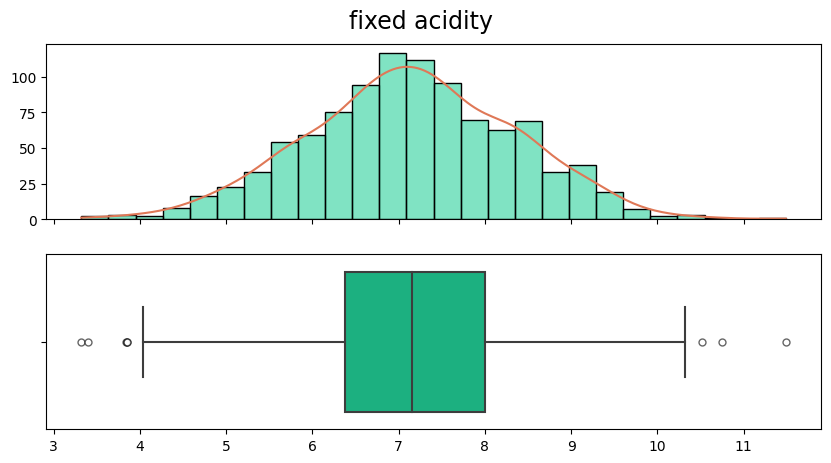

In [18]:
# Untuk kolom fixed acidity
hist_box_plot(anggur, anggur.columns[0])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan condong kiri (*negative skewed*) yang hampir tidak terlihat. 
- Berdasarkan boxplot, terlihat bahwa data fix acidity sangat beragam dengan nilai minimumnya hampir mendekati 4 dan maksimumnya melebihi 10 serta mediannya sedikit di atas 7
- Terdapat beberapa *outliers* yang terlihat di bawah nilai minimum maupun di atas nilai maksimum. 

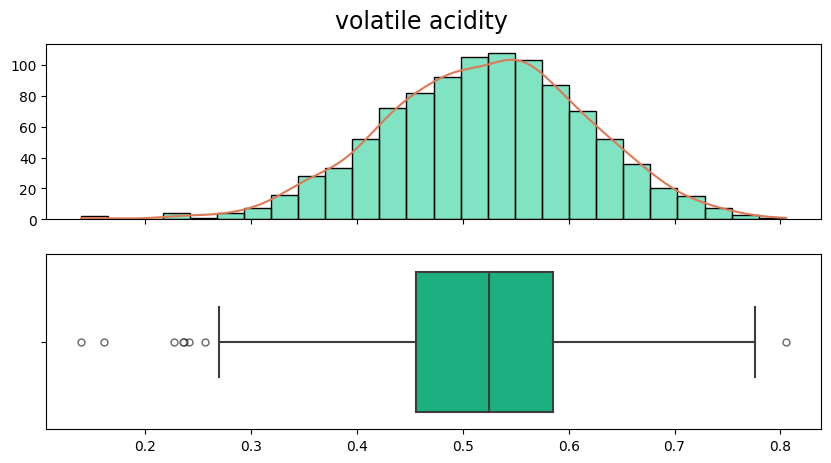

In [19]:
# Untuk kolom volatile acidity
hist_box_plot(anggur, anggur.columns[1])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *volatile acidity* memiliki rentang yang cukup kecil.
- Nilai minimumnya kurang dari 0.3 dan maksimumnya kurang dari 0.8 serta mediannya sedikit di atas 0.5.
- Terdapat 1 *outliers* yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum. 

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

p = 0.0225815
H0 ditolak, normal


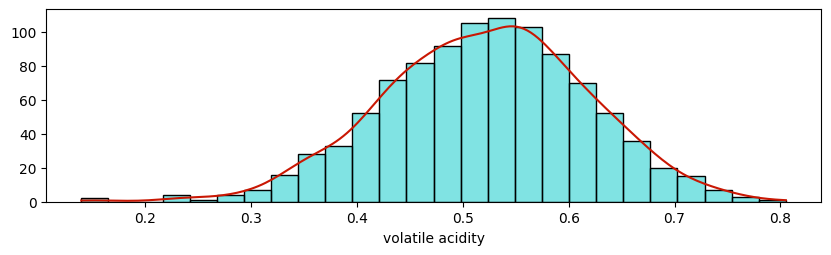

In [47]:
def normality(column):
    k2,p = stats.normaltest(anggur[column])
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  
        print("H0 ditolak, normal")
    else:
        print("H0 tidak bisa ditolak, tidak normal")
    fig, ax1 =plt.subplots(nrows=1,ncols = 1, figsize=(10, 2.5), sharex=True)
    g1 = sns.histplot(data = anggur, x = column, ax=ax1, color="#03c9c9", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#c91703')
    g1.set(ylabel=None)
normality(columns[1])


### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

#### Langkah Testing : 
1. Tentukan Hipotesis nol ($H_0: \theta = \theta_0$), dimana $\theta$ bisa berupa $\theta$, $\theta$, $p$, atau data lain berdistribusi tertentu(Normal, binomial, dsc.)
2. Pilih hipotesis alternatif $H_1$ salah dari dari $\theta > \theta_0$ , $\theta < \theta_0$ , atau $\theta \neq \theta_0$
3. Tentukan tingkat signifikan $\alpha$
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung *p-value* sesuai dengan uji statistik yang
digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika *p-value* lebih kecil dibanding tingkat signifikansi $\alpha$ yang diinginkan

In [ ]:
def hipotesis_1(data,keterangan,batas) :
    #keterangan untuk lebih dari, kurang dari, sama dengan, proporsi
    #batas merupakan nilai yang menjadi batas uji
    H0="μ="+str(batas)

    if(keterangan=="lebih dari") :
        H1="μ>"+str(batas)
        alpa=0.05
        print("uji single right tailed")
        z,p=ztest(data, value=batas, alternative='larger')
        za=st.norm.ppf(1-alpa)
        
    elif(keterangan=="kurang dari") :
        keterangan="<"
    elif(keterangan=="sama dengan") :
        keterangan="=="
    elif(keterangan=="proporsi") :